In [1]:
# installing the needed libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import xgboost
import shap

# load JS visualization code to notebook
shap.initjs()

In [2]:
df = pd.read_json('logging_entries_transform_nd.json', lines=True)

In [3]:
df.head()

,solarVoltage,timestamp,temperature,brightness,frequency,rssi,moisture,chargingDurationDay,irrigationNextStart,irrigationNextEnd,lastIrrigationStart,lastIrrigationEnd,lastIrrigationDuration,lastResetType,lastResetTime
0,1.81,2019-08-03 10:40:30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,2019-08-03 10:44:24,21.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,2019-08-03 10:44:24,NaN,17593.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,2019-08-03 10:44:24,NaN,NaN,959250.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4.34,2019-08-03 10:44:24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df = pd.pivot_table(df, values=['solarVoltage', 'temperature', 'brightness', 'frequency', 'moisture', 'rssi'], index=['timestamp'])

In [5]:
df.head()

,brightness,frequency,moisture,rssi,solarVoltage,temperature
timestamp,,,,,,
2019-08-03 10:40:30,NaN,NaN,NaN,NaN,1.81,NaN
2019-08-03 10:44:24,17593.0,959250.0,NaN,NaN,4.34,21.0
2019-08-03 10:45:06,NaN,NaN,NaN,NaN,2.17,NaN
2019-08-03 10:49:43,NaN,NaN,NaN,NaN,3.12,NaN
2019-08-03 10:52:01,20096.0,960925.0,NaN,NaN,NaN,23.0


In [6]:
df.reset_index(inplace=True)
df['timestamp'] = pd.to_datetime(df['timestamp'])

In [7]:
df.fillna(method='ffill', inplace=True)

In [8]:
df.head()

,timestamp,brightness,frequency,moisture,rssi,solarVoltage,temperature
0,2019-08-03 10:40:30,NaN,NaN,NaN,NaN,1.81,NaN
1,2019-08-03 10:44:24,17593.0,959250.0,NaN,NaN,4.34,21.0
2,2019-08-03 10:45:06,17593.0,959250.0,NaN,NaN,2.17,21.0
3,2019-08-03 10:49:43,17593.0,959250.0,NaN,NaN,3.12,21.0
4,2019-08-03 10:52:01,20096.0,960925.0,NaN,NaN,3.12,23.0


In [9]:
df.dropna(inplace=True)

In [10]:
df['time_hour'] = df['timestamp'].apply(lambda ts: ts.hour)

In [11]:
df.head()

,timestamp,brightness,frequency,moisture,rssi,solarVoltage,temperature,time_hour
21,2019-08-03 11:37:35,11703.0,986275.0,72.0,-67.0,4.36,31.0,11
22,2019-08-03 11:40:26,11703.0,986275.0,72.0,-66.0,0.97,31.0,11
23,2019-08-03 11:45:03,11703.0,986275.0,72.0,-66.0,0.42,31.0,11
24,2019-08-03 11:49:39,11703.0,986275.0,72.0,-66.0,0.25,31.0,11
25,2019-08-03 11:52:47,2454.0,999900.0,72.0,-66.0,0.25,23.0,11


In [29]:
df.to_csv('miyo_data_frame.csv', index=False)

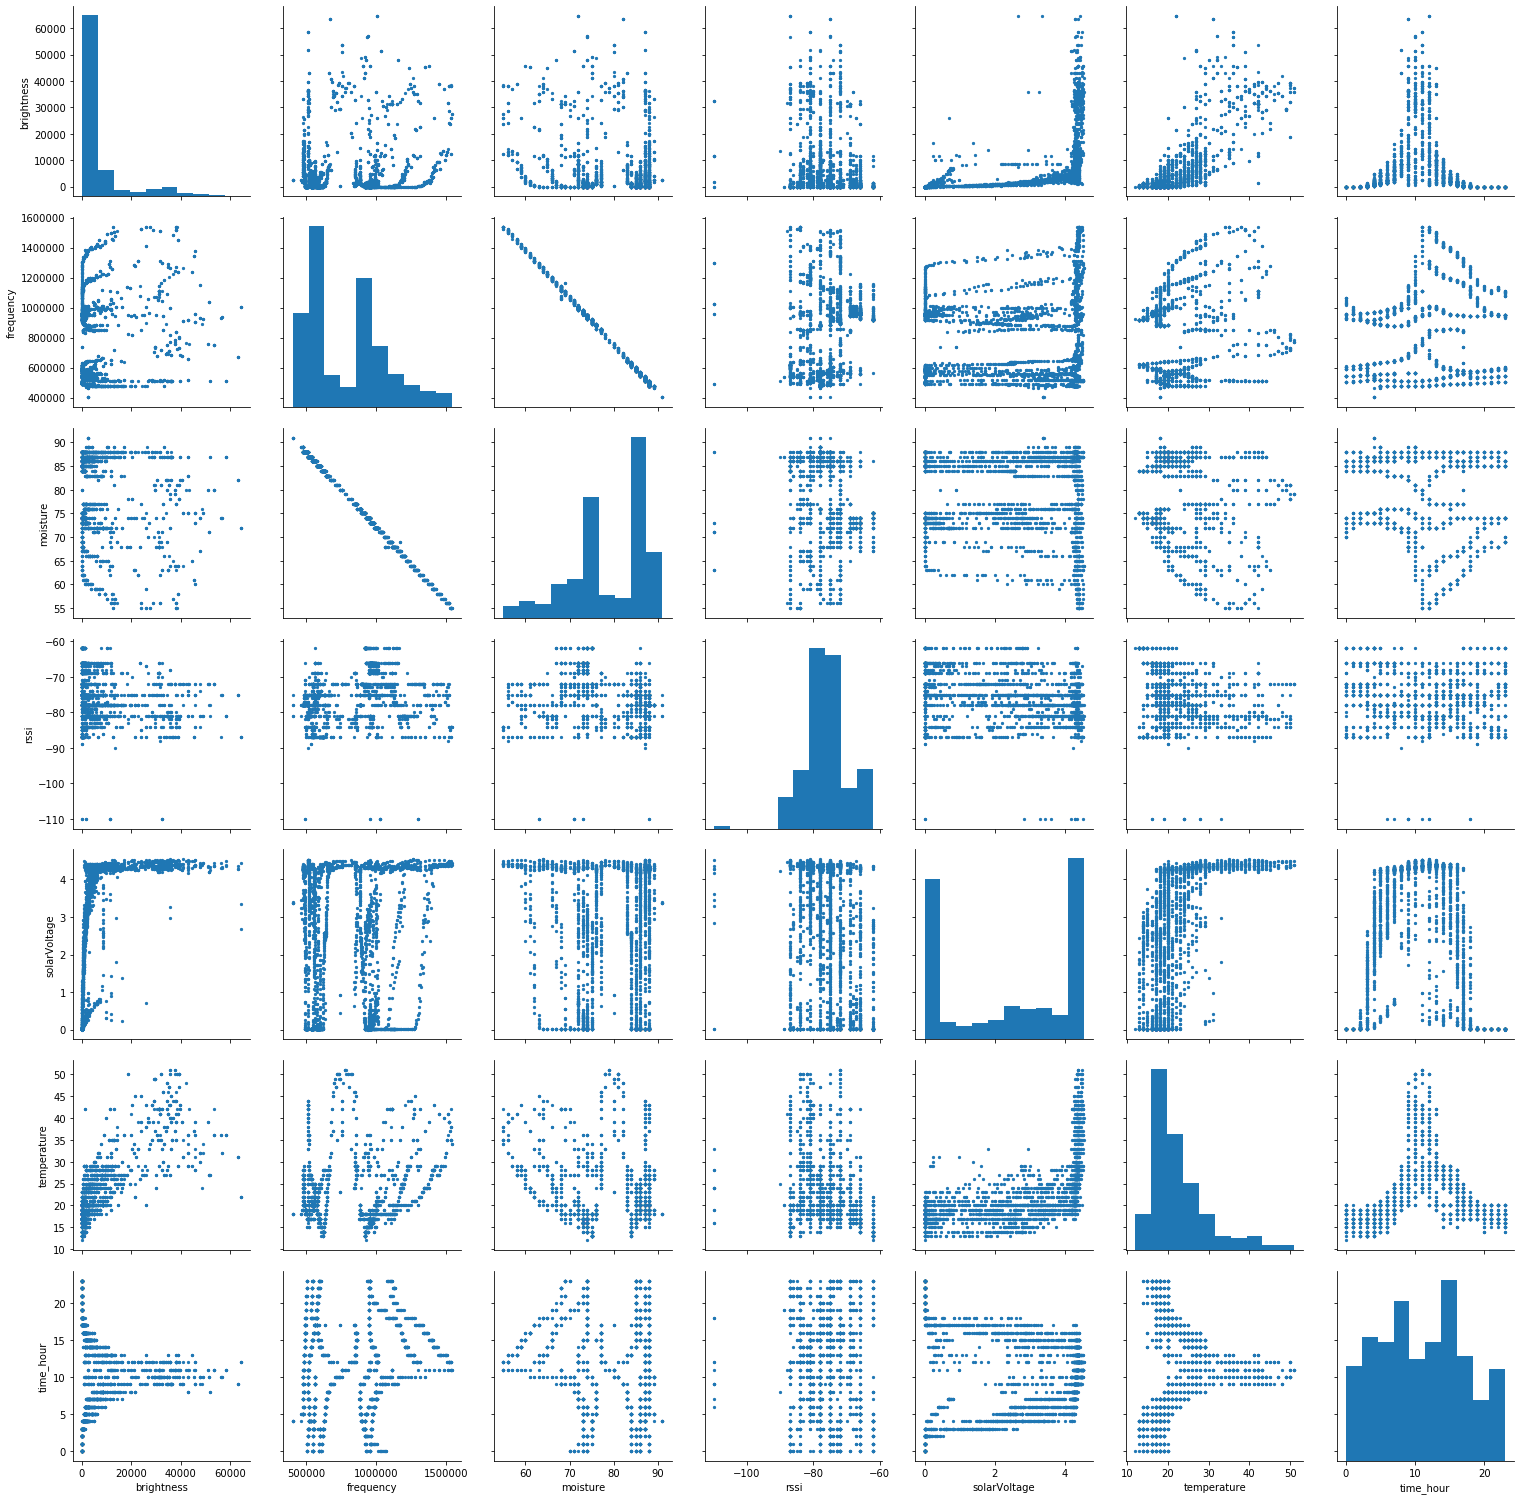

In [12]:
g2 = sns.pairplot(
    df,
    plot_kws=dict(s=5, edgecolor=None, linewidth=1), height=3
)

In [13]:
miyo_attributes = ["brightness", "frequency", "moisture", "temperature", "time_hour", "rssi"]
solar_attributes = ['solarVoltage']

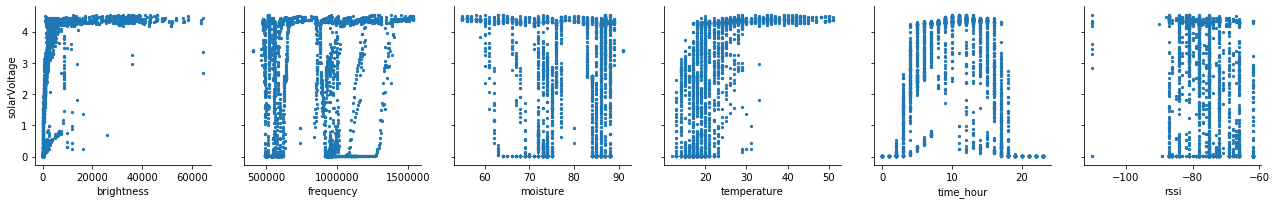

In [14]:
g2 = sns.pairplot(
    df,
    x_vars=miyo_attributes,
    y_vars=solar_attributes, palette="Blues",
    plot_kws=dict(s=5, edgecolor=None, linewidth=1), height=3
)
#g2.map_offdiag(sns.regplot, scatter_kws={"s": 1});

In [15]:
df.corr() 

,brightness,frequency,moisture,rssi,solarVoltage,temperature,time_hour
brightness,1.000000,0.146691,-0.150675,-0.160039,0.556398,0.781705,-0.061461
frequency,0.146691,1.000000,-0.999284,0.232329,0.052412,0.154515,0.129520
moisture,-0.150675,-0.999284,1.000000,-0.231375,-0.057230,-0.156902,-0.124344
rssi,-0.160039,0.232329,-0.231375,1.000000,-0.237327,-0.247773,-0.043396
solarVoltage,0.556398,0.052412,-0.057230,-0.237327,1.000000,0.621615,-0.173057
temperature,0.781705,0.154515,-0.156902,-0.247773,0.621615,1.000000,0.110307
time_hour,-0.061461,0.129520,-0.124344,-0.043396,-0.173057,0.110307,1.000000


In [16]:
miyo = df[miyo_attributes]
solar = df[solar_attributes]

In [17]:
miyo.head()

,brightness,frequency,moisture,temperature,time_hour,rssi
21,11703.0,986275.0,72.0,31.0,11,-67.0
22,11703.0,986275.0,72.0,31.0,11,-66.0
23,11703.0,986275.0,72.0,31.0,11,-66.0
24,11703.0,986275.0,72.0,31.0,11,-66.0
25,2454.0,999900.0,72.0,23.0,11,-66.0


In [18]:
solar.head()

,solarVoltage
21,4.36
22,0.97
23,0.42
24,0.25
25,0.25


In [19]:
model = xgboost.train({"learning_rate": 0.001}, xgboost.DMatrix(miyo, label=solar), 1000)

In [20]:
# explain the model's predictions using SHAP
# (same syntax works for LightGBM, CatBoost, scikit-learn and spark models)
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(miyo)

Setting feature_perturbation = "tree_path_dependent" because no background data was given.


In [21]:
shap.force_plot(explainer.expected_value, shap_values[0,:], miyo.iloc[0,:])

In [22]:
shap.force_plot(explainer.expected_value, shap_values[50,:], miyo.iloc[50,:])

In [23]:
shap.force_plot(explainer.expected_value, shap_values[750,:], miyo.iloc[750,:])

In [24]:
# visualize the training set predictions
shap.force_plot(explainer.expected_value, shap_values, miyo)

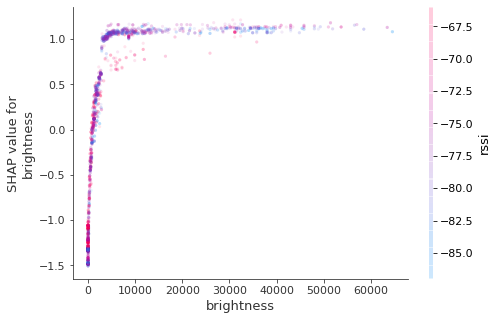

In [25]:
# create a dependence plot to show the effect of a single feature across the whole dataset
shap.dependence_plot('brightness', shap_values, miyo, alpha=.1, dot_size=10)

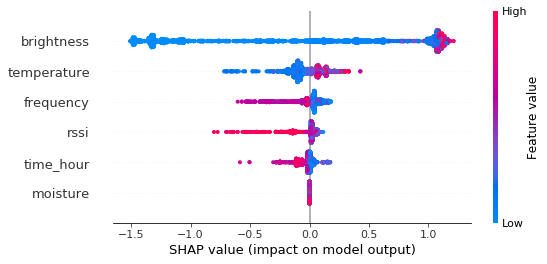

In [26]:
# summarize the effects of all the features
shap.summary_plot(shap_values, miyo)

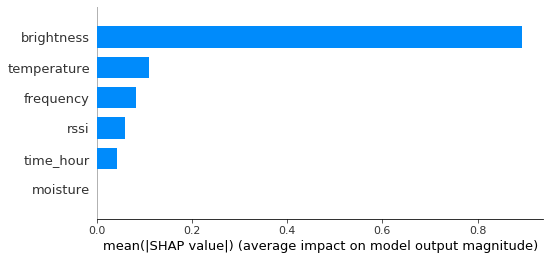

In [27]:
shap.summary_plot(shap_values, miyo, plot_type="bar")